In [1]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [13]:
CSV_TRAIN_LABELS = 'data/labels/train_labels.csv'
TRAIN_IMAGE_DIR = "data/bdd100k_images_100k/100k/train"

In [3]:
df = pd.read_csv(CSV_TRAIN_LABELS)

In [16]:
person_df = df[df['category'] == 'person']
person_df.head()

,image,category,x1,y1,x2,y2
57,0010bf16-9ee17cd9,person,536.184128,297.871006,550.293806,332.361334
58,0010bf16-9ee17cd9,person,760.371252,304.141975,785.455129,376.258113
59,0010bf16-9ee17cd9,person,785.455127,297.871006,816.809969,379.393597
81,002b485a-3f6603f2,person,838.962497,438.302481,850.564620,464.084979
95,002d290d-01969e7d,person,945.381671,436.298001,969.088999,489.951425


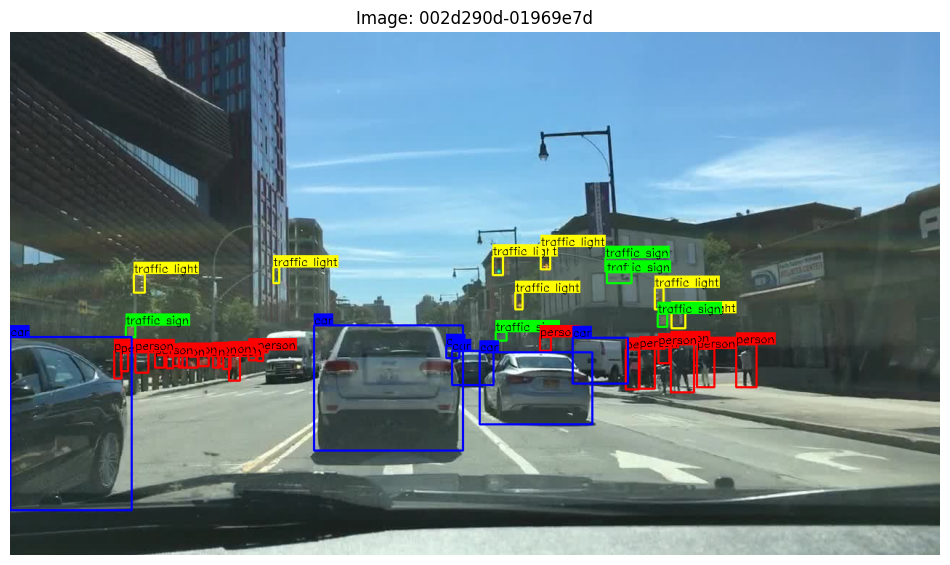

In [20]:
img_name="002d290d-01969e7d"
img_path = os.path.join(TRAIN_IMAGE_DIR, img_name +".jpg")
img = cv2.imread(img_path)

img_annotations = df[df['image'] == img_name]

for index, row in img_annotations.iterrows():
        # Extract coordinates and class
        x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
        category = row['category']
        
        # Color map for different classes (BGR format for OpenCV)
        colors = {
            'car': (255, 0, 0),       # Blue
            'person': (0, 0, 255),    # Red
            'traffic sign': (0, 255, 0), # Green
            'traffic light': (0, 255, 255) # Yellow
        }
        color = colors.get(category, (255, 255, 255)) # Default white
        
        # Draw Rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        
        # Draw Label Background (for readability)
        label_text = category
        (text_w, text_h), baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(img, (x1, y1 - text_h - 4), (x1 + text_w, y1), color, -1) # Filled rectangle
        
        # Draw Text
        cv2.putText(img, label_text, (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off') # Hide axes for a cleaner look
plt.title(f"Image: {img_name}")
plt.show()